/home/pankaj/s_meet/python_practice/function_python/labview_plot/data_iv
['20210621_1_QT6__UV__ON__137mA__50_Ohm_.dat', '20210621_1_QT6__UV__ON__137mA__50_Ohm__LOG.txt'] 

Index(['S1C1', 'S1C2', 'S2C1', 'S2C2', 'S3C1', 'S3C2', 'Unnamed: 6'], dtype='object')


<AxesSubplot:xlabel='S3C1'>

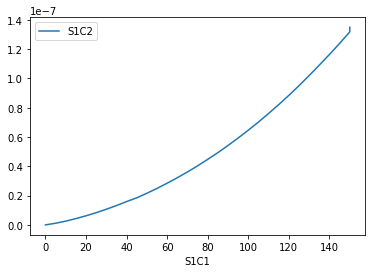

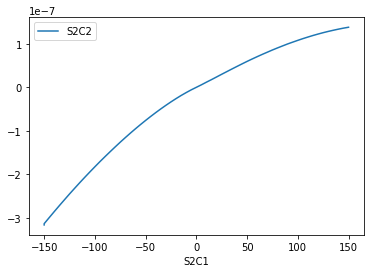

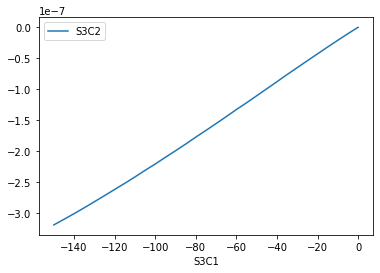

In [52]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from os import walk
import os
import math
##----------------------------------------------------
## Program to read data.
dir_location = os.getcwd() # To get the current working directory.
#dir_location = os.path.dirname(__file__) #Not working in Jupyter-notbook (website: urle.me/cY1)
location = os.path.join(dir_location, 'data_iv') #joining the current working directory to a new folder "data_iv"
print(location)
for (dirpath, _, filenames) in walk(location):
    print(filenames,'\n')
    data = pd.read_table(r'/home/pankaj/s_meet/python_practice/function_python/labview_plot/data_iv/20210621_1_QT6__UV__ON__137mA__50_Ohm_.dat')
    data = pd.DataFrame(data).drop([0])
    data =data.astype(float)
    
    #    print(pd.DataFrame(data))
##-----------------------------------------------------

print(data.columns) # To know the name of the columns
#print(data.index)   # To know the number of rows
#x = data[data.columns[0]][1:].astype(float).array
#y = data[data.columns[1]][1:].astype(float).array
#plot(x,y)
#data[data.columns[0]][1:]
#data.plot(x='S1C1',y='S1C2')

data.plot(x='S1C1', y='S1C2')
data.plot(x='S2C1', y='S2C2')
data.plot(x='S3C1', y='S3C2')

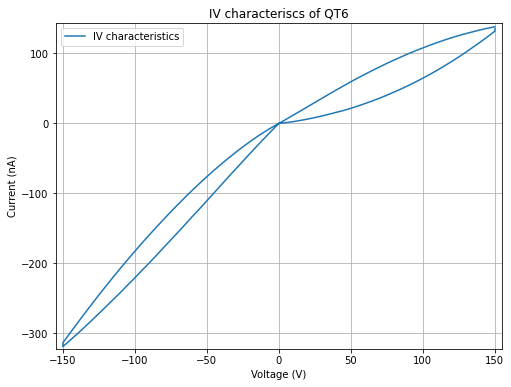

In [89]:
total_x_axis = (data['S1C1'].append(data['S2C1'])).append(data['S3C1'])
total_y_axis = (data['S1C2'].append(data['S2C2'])).append(data['S3C2'])
current_unit = 1e-9 #Selecting the current unit.

###---------------------------------------
### For ploting
plt.figure(figsize=(8,6))
plt.title("IV characteriscs of QT6")
plt.plot(total_x_axis, total_y_axis/current_unit, label="IV characteristics")
plt.grid(True)
plt.xlabel('Voltage (V)')
plt.ylabel('Current (nA)')
plt.ylim(math.floor(min(data['S2C2'])/current_unit)-5,math.ceil(max(data['S2C2'])/current_unit)+5)
plt.xlim((min(data['S2C1'])-5),5+(max(data['S2C1'])))
plt.legend()
plt.show()
###---------------------------------------


-316
138.0884


(-150.0, 150.0)

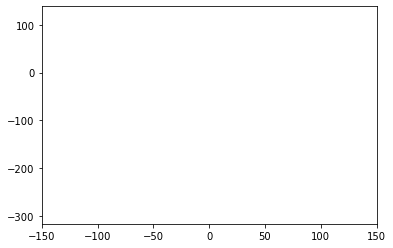

In [54]:
total_x_axis/10e-9
print(int(min(data['S2C2'])/1e-9))
print(max(data['S2C2'])/1e-9)
plt.ylim(math.floor(min(data['S2C2'])/1e-9),math.ceil(max(data['S2C2'])/1e-9))
plt.xlim(int(min(data['S2C1'])),int(max(data['S2C1'])))

In [44]:
max(data['S2C2'])

1.380884e-07